## Домашнее задание к занятию от 16.09.2019 г. «Центральная предельная теорема и статистический анализ данных в Python»
ФИО: Кривова Татьяна Сергеевна

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
import statistics

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [3]:
import io
import requests

url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)

In [4]:
raw_data.head() # raw_data.shape --> (506, 14)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
# Подробный отчет по датасету. Смотрю графики распределения для каждой переменной
pandas_profiling.ProfileReport(raw_data)

# RM и MEDV визуально похожи на нормальное распределение, далее делаю проверку sts.normaltest

Text(0.5, 1.0, 'Частотный график для параметра RM (sns.distplot)')

Text(0.5, 0, 'RM_values')

Text(0, 0.5, 'Frequency')

(3, 9)

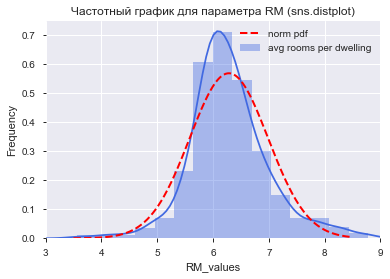

In [6]:
sns.distplot(raw_data.RM, bins=15, color="royalblue", label='avg rooms per dwelling') # Частотный график (RM)
plt.title('Частотный график для параметра RM (sns.distplot)')
plt.grid(True)
plt.xlabel('RM_values')
plt.ylabel('Frequency')
plt.xlim(3,9)

mu = round(statistics.mean(raw_data.RM), 3) # Среднее значение
sigma = round(statistics.stdev(raw_data.RM), 3) # Стандартное отклонение

norm_rv = sts.norm(loc=mu, scale=sigma) # Random variates
x = np.linspace(3.5,8.5,500) 
pdf = norm_rv.pdf(x) # Probability density function

plt.plot(x, pdf, color='red', linestyle='dashed', linewidth=2, label='norm pdf') # График нормального распределения
plt.legend()

In [7]:
sts.normaltest(raw_data.RM), sts.skewtest(raw_data.RM), sts.kurtosistest(raw_data.RM)
#т.к. pvalue в NormaltestResult < 0.05 ==> RM не соответствует нормальному распределению

x = sts.norm.rvs(loc=mu, scale=sigma, size=500) # проверка
sts.normaltest(x), sts.skewtest(x), sts.kurtosistest(x)

(NormaltestResult(statistic=37.89574305099423, pvalue=5.90260814347777e-09),
 SkewtestResult(statistic=3.6165514870123805, pvalue=0.0002985539551619877),
 KurtosistestResult(statistic=4.981595968440512, pvalue=6.306199609890676e-07))

(NormaltestResult(statistic=1.2948571750318019, pvalue=0.5233898991946241),
 SkewtestResult(statistic=-1.0792441763272433, pvalue=0.28047889112396274),
 KurtosistestResult(statistic=0.36067878076694787, pvalue=0.7183395889626223))

Text(0.5, 1.0, 'Частотный график для параметра MEDV (sns.distplot)')

Text(0.5, 0, 'MEDV_values')

Text(0, 0.5, 'Frequency')

(0, 60)

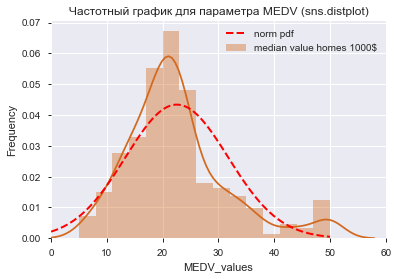

In [8]:
sns.distplot(raw_data.MEDV, bins=15, color="chocolate", label='median value homes 1000$') # Частотный график (MEDV)
plt.title('Частотный график для параметра MEDV (sns.distplot)')
plt.grid(True)
plt.xlabel('MEDV_values')
plt.ylabel('Frequency')
plt.xlim(0,60)

mu = round(statistics.mean(raw_data.MEDV), 3) # Среднее значение
sigma = round(statistics.stdev(raw_data.MEDV), 3) # Стандартное отклонение

norm_rv = sts.norm(loc=mu, scale=sigma) # Random variates
x = np.linspace(0,50,500) 
pdf = norm_rv.pdf(x) # Probability density function

plt.plot(x, pdf, color='red', linestyle='dashed', linewidth=2, label='norm pdf') # График нормального распределения
plt.legend()

In [9]:
sts.normaltest(raw_data.MEDV), sts.skewtest(raw_data.MEDV), sts.kurtosistest(raw_data.MEDV)
#т.к. pvalue в NormaltestResult < 0.05 ==> MEDV не соответствует нормальному распределению

(NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20),
 SkewtestResult(statistic=8.495940647257724, pvalue=1.963363120792763e-17),
 KurtosistestResult(statistic=4.335167803946083, pvalue=1.4564897365966999e-05))

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное - **нет**
2.   Равномерное - **нет**
3.   Биноминальное - **LSTAT**
4.   Бернулли - **CHAS**
5.   Геометрическое - **ZN**
6.   Логнормальное - **DIS**



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ECF0670>,
      dtype=object)

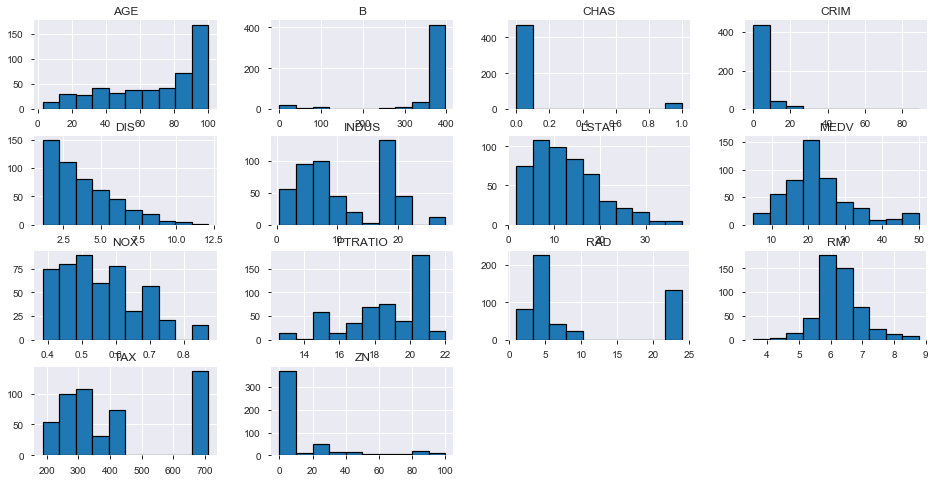

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

raw_data.hist(edgecolor='black', linewidth=1.2)

In [11]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [12]:
df.head() # df.shape --> (156, 11)

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

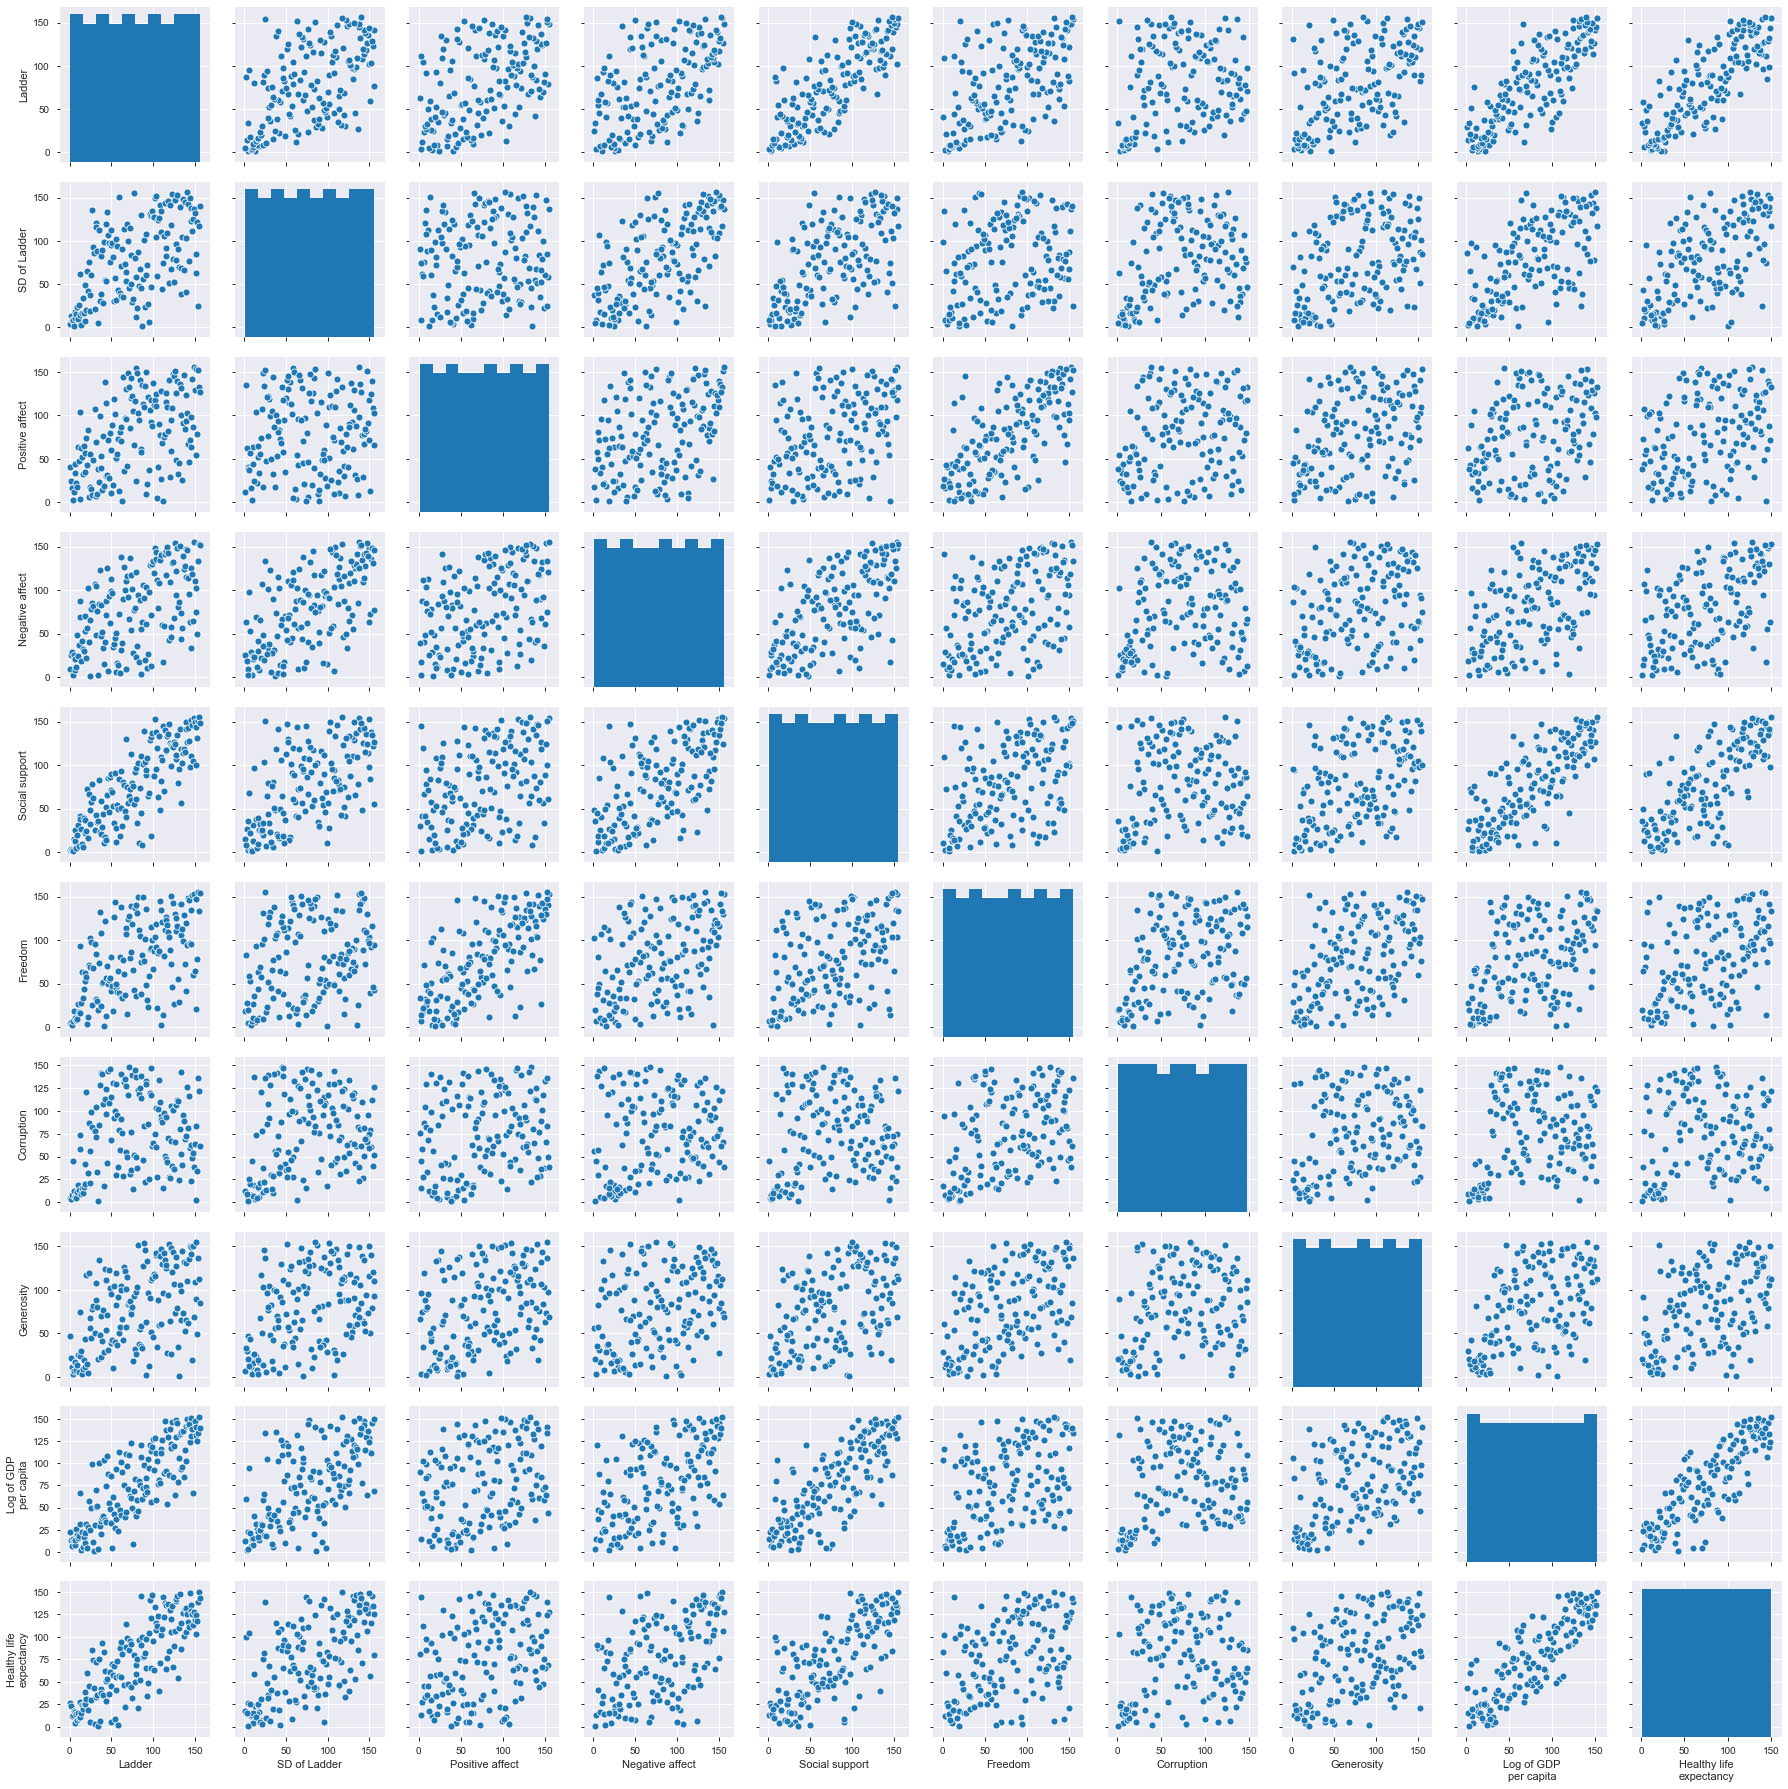

In [13]:
sns.pairplot(df)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [25]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [15]:
# Подробный отчет по датасету. Смотрю есть ли отсутствующие значения для каждой переменной
pandas_profiling.ProfileReport(data)

# Missing cells 23 (1.3%):
# Corruption 8, Freedom 1, Generosity 1, Healthy_life expectancy 6, Log_of_GDP per_capita 4, 
# Negative_affect 1, Positive_affect 1, Social_support 1

In [26]:
data.dropna(inplace=True)

In [27]:
X = data.iloc[:,1:]
np.around(np.cov(X.T), decimals=2) # матрица ковариаций

array([[2088.55, 1171.89, 1037.04, 1097.68, 1745.01, 1126.44,  437.44,
         992.82, 1625.96, 1661.55],
       [1171.89, 2127.17,  184.7 , 1298.8 , 1268.03,  520.63,  498.42,
         796.97, 1327.72, 1293.22],
       [1037.04,  184.7 , 1965.29,  694.32,  880.14, 1392.96,  427.19,
         826.97,  597.46,  661.01],
       [1097.68, 1298.8 ,  694.32, 1980.8 , 1369.01,  835.04,  316.04,
         697.81, 1091.7 ,  992.68],
       [1745.01, 1268.03,  880.14, 1369.01, 2099.09,  989.15,  290.98,
         918.33, 1592.89, 1521.9 ],
       [1126.44,  520.63, 1392.96,  835.04,  989.15, 2034.82,  784.24,
        1005.23,  754.77,  841.07],
       [ 437.44,  498.42,  427.19,  316.04,  290.98,  784.24, 1819.54,
         536.4 ,  344.25,  279.48],
       [ 992.82,  796.97,  826.97,  697.81,  918.33, 1005.23,  536.4 ,
        2000.57,  891.58,  891.37],
       [1625.96, 1327.72,  597.46, 1091.7 , 1592.89,  754.77,  344.25,
         891.58, 1879.77, 1665.84],
       [1661.55, 1293.22,  661.01,  9

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [28]:
data.shape # 140 стран

# Данные значения не являются проблемой классификации, т.к. отсутствует набор предопределенных классов.
# Это задача кластеризации (или сегментации).

(140, 11)

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

*На вебинаре говорили, что текст задания будет скорректирован*

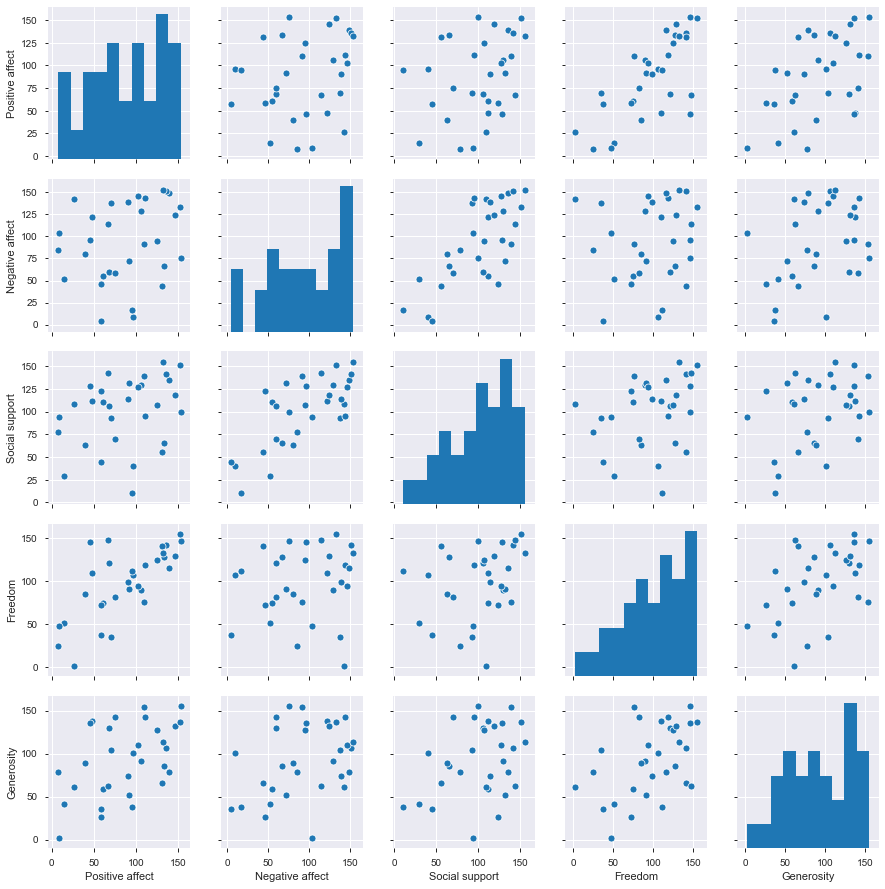

In [31]:
# Смотрю страны выше среднего по параметрам Corruption и Healthy life\nexpectancy

#statistics.mean(data['Corruption']) # среднее 75.7
#statistics.mean(data['Healthy life\nexpectancy']) # среднее 75.47857142857143

sns.pairplot(data[data.Corruption > 76][data['Healthy life\nexpectancy']>76][['Positive affect', 'Negative affect', 'Social support', 'Freedom', 'Generosity']])

In [32]:
#Похожи страны
data[data.Corruption > 76][data['Healthy life\nexpectancy']>76][data.Freedom < 50]

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
26         Guatemala      27           136              8.0             85.0   
60           Bolivia      61            71             70.0            138.0   
85        Kyrgyzstan      86            46             58.0              4.0   
91         Indonesia      92           108              9.0            104.0   
108         Cambodia     109           135             27.0            142.0   

     Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
26             78.0     25.0        82.0        78.0                    99.0   
60             93.0     35.0        91.0       104.0                   101.0   
85             45.0     38.0       138.0        36.0                   120.0   
91             94.0     48.0       129.0         2.0                    83.0   
108           109.0      2.0        94.0        61.0                   116.0   

     Healthy life\nexpectancy  
26                       85.0  
60                       94.0  
85                       91.0  
91                       98.0  
108                     102.0

In [33]:
#Похожи страны
data[data.Corruption > 76][data['Healthy life\nexpectancy']>76][data['Negative affect'] > 100]

Country (region)  Ladder  SD of Ladder  Positive affect  \
60                    Bolivia      61            71             70.0   
91                  Indonesia      92           108              9.0   
95                   Cameroon      96           131            106.0   
103                     Gabon     104           105            111.0   
108                  Cambodia     109           135             27.0   
127                      Mali     128            96             48.0   
128              Sierra Leone     129           153            139.0   
131                      Chad     132           139            136.0   
135                    Uganda     136           148             91.0   
136                     Egypt     137            66            146.0   
140                   Liberia     141           156            103.0   
141                   Comoros     142           143             67.0   
153               Afghanistan     154            25            152.0   
154  Central African Republic     155           117            132.0   

     Negative affect  Social support  Freedom  Corruption  Generosity  \
60             138.0            93.0     35.0        91.0       104.0   
91             104.0            94.0     48.0       129.0         2.0   
95             129.0           129.0     90.0       120.0        91.0   
103            144.0            95.0    119.0       103.0       143.0   
108            142.0           109.0      2.0        94.0        61.0   
127            122.0           112.0    110.0       107.0       138.0   
128            149.0           135.0    116.0       112.0        79.0   
131            151.0           141.0    142.0        80.0       106.0   
135            139.0           114.0     99.0        95.0        74.0   
136            124.0           118.0    129.0        89.0       132.0   
140            146.0           127.0     94.0       126.0       110.0   
141            114.0           143.0    148.0        81.0        62.0   
153            133.0           151.0    155.0       136.0       137.0   
154            153.0           155.0    133.0       122.0       113.0   

     Log of GDP\nper capita  Healthy life\nexpectancy  
60                    101.0                      94.0  
91                     83.0                      98.0  
95                    121.0                     141.0  
103                    59.0                     108.0  
108                   116.0                     102.0  
127                   129.0                     142.0  
128                   145.0                     146.0  
131                   133.0                     148.0  
135                   136.0                     127.0  
136                    85.0                     101.0  
140                   150.0                     126.0  
141                   143.0                     117.0  
153                   134.0                     139.0  
154                   152.0                     150.0

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [34]:
correlations = X.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(3)

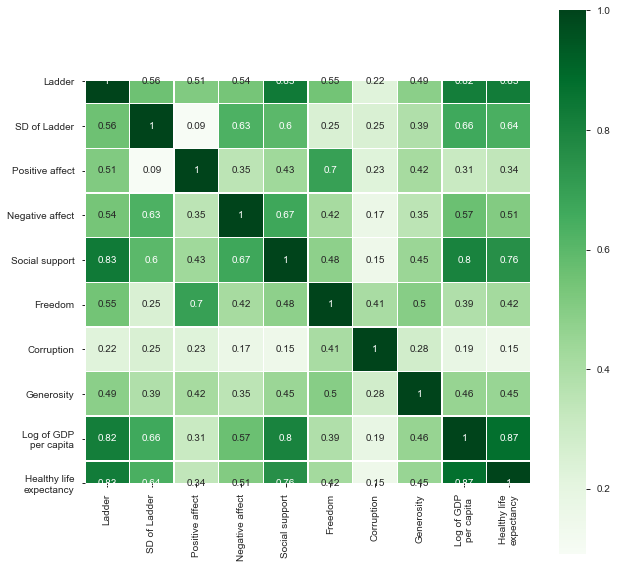

In [35]:
rcParams['figure.figsize'] = 10,10
sns.heatmap(correlations, annot=True,linewidths=.5, square=True, cmap="Greens")

In [36]:
# Корреляция выше 0.8 у переменных: Ladder, Social support, Log of GDP per capita, Healthy life expectancy

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

Text(0.5, 0, 'Generosity')

Text(0, 0.5, 'Ladder')

Text(0.5, 1.0, 'Корреляционная зависимость двух выборок')

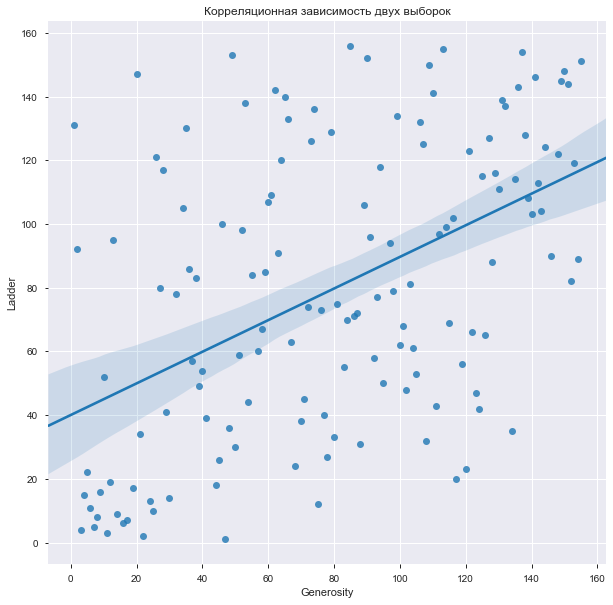

In [37]:
generosity = data.Generosity #The extent to which Generosity contributed to the calculation of the Happiness Score.
ladder = data.Ladder #Cantril Ladder is a measure of life satisfaction.

sns.regplot(x=generosity, y=ladder, data=data, fit_reg=True)

plt.xlabel('Generosity')
plt.ylabel('Ladder')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(True)

Text(0.5, 1.0, 'Регрессионная прямая и собственные векторы')

(-80, 80)

(-80, 80)

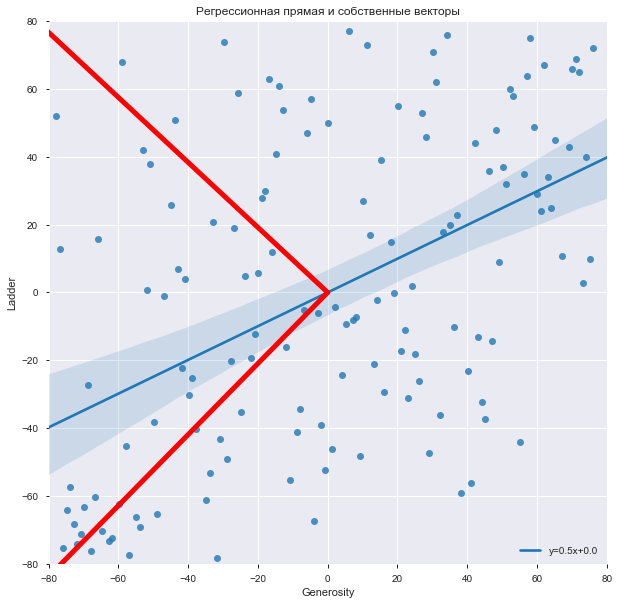

In [39]:
mean1 = statistics.mean(generosity)
generosity -= mean1
mean2 = statistics.mean(ladder)
ladder -= mean2

Y = np.vstack((generosity, ladder)).T
w,v = np.linalg.eig(np.cov(Y.T))

slope, intercept, r_value, p_value, std_err = sts.linregress(generosity,ladder)

sns.regplot(x=generosity, y=ladder, data=data, fit_reg=True, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.plot([mean1, mean1+w[0]*v[:,0][0]], [mean2, mean2 +w[0] * v[:,0][1]],color='red', linewidth=5)

plt.plot([mean1, mean1+w[1]*v[:,1][0]], [mean2, mean2 +w[1] * v[:,1][1]],color='red', linewidth=5)

plt.title('Регрессионная прямая и собственные векторы')
plt.legend()
plt.grid(True)
plt.xlim(-80,80)
plt.ylim(-80,80)

In [40]:
# Нельзя сказать, что данная прямая (sns.regplot) является собственным вектором. 
# Остаток (= ошибка) в случае регрессионного анализа - это вертикальное расстояние каждой точки от линии. Линию лучшей подгонки выбирают так, чтобы сумма квадратов остатков была минимальной.
# При проецировании данных на эту прямую разброс данных немаксимален.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [41]:
from random import randint as rnd

def play(experiments):
    results = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    for i in range(experiments):
        result = rnd(1, 6)
        for key,value in results.items():
            if result == key: results[key]+=1
    height = results.values()
    return list(height) # Результаты подбрасывания кубика (количество выпадений каждой грани)

Результаты подбрасывания кубика (количество выпадений каждой грани) [0, 3, 1, 1, 2, 3]


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Моделирование 10 подбрасываний игрального кубика (plt.bar)')

Text(0.5, 0, 'Грань кубика')

Text(0, 0.5, 'Количество встречаемости значения')

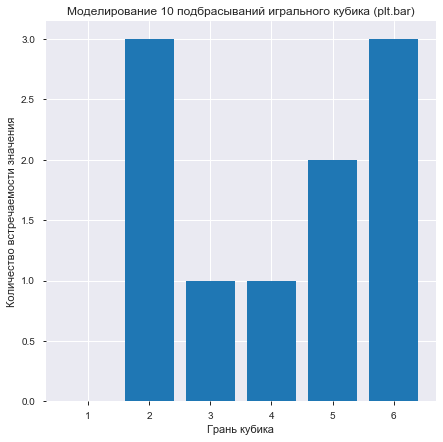

In [46]:
x = [i+1 for i in range(6)]
y = play(10)

print(f'Результаты подбрасывания кубика (количество выпадений каждой грани) {y}')

rcParams['figure.figsize'] = 7,7
plt.bar(x, height=y)
         
plt.title('Моделирование 10 подбрасываний игрального кубика (plt.bar)')
plt.grid(True)
plt.xlabel('Грань кубика')
plt.ylabel('Количество встречаемости значения')

# равномерное распределение

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

Результаты подбрасывания кубика (количество выпадений каждой грани) [150, 156, 175, 165, 169, 185]


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Моделирование 1000 подбрасываний игрального кубика (plt.bar)')

Text(0.5, 0, 'Грань кубика')

Text(0, 0.5, 'Количество встречаемости значения')

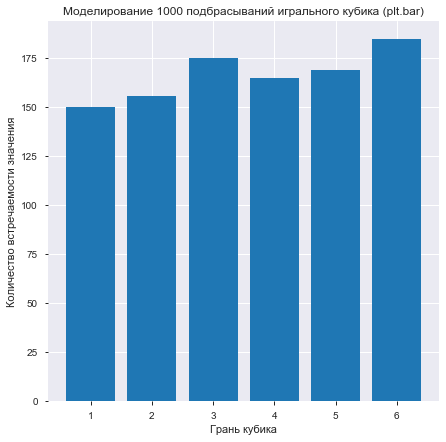

In [47]:
z = play(1000)

print(f'Результаты подбрасывания кубика (количество выпадений каждой грани) {z}')

rcParams['figure.figsize'] = 7,7
plt.bar(x, height=z)
         
plt.title('Моделирование 1000 подбрасываний игрального кубика (plt.bar)')
plt.grid(True)
plt.xlabel('Грань кубика')
plt.ylabel('Количество встречаемости значения')

# График изменился и стал визуально более похож на равномерное распределение, т.к. увеличилось количество испытаний.

Один эксперимент с подбрасыванием кубика:  [1 5 1 4 4 2 2 2 2 5 1 5 5 1 4 3 3 5 1 1 1 2 1 5 5 4 4 2 3 4 5 4 4 2 4 1 5
 4 5 1 4 2 4 3 1 5 4 1 4 3 1 1 2 4 1 2 2 2 2 3 4 4 3 1 2 3 2 1 3 1 2 2 1 3
 4 5 3 4 1 2 2 5 5 4 4 4 4 1 5 5 5 1 5 2 5 5 3 1 4 3]


(array([  1.,  48.,  72., 240., 222., 250., 126.,  21.,  17.,   3.]),
 array([ 8. , 10.6, 13.2, 15.8, 18.4, 21. , 23.6, 26.2, 28.8, 31.4, 34. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Количество выпадений грани "5" в 1000 экспериментах (из 100 подбрасываний кубика)')

Text(0, 0.5, 'Количество встречаемости значения')

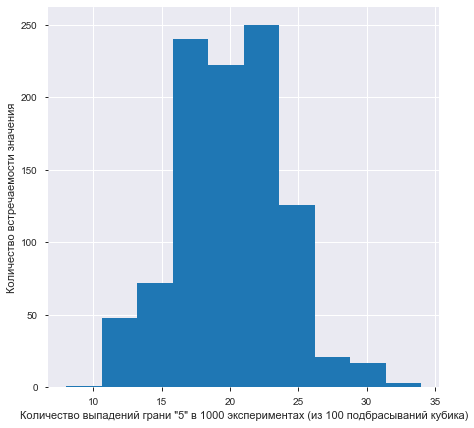

In [48]:
# Применение ЦПТ:

n_experiments = 1000
trials = 100

rng = np.random.RandomState([1,2,3,4,5,6])
outcomes = []

for i in range(n_experiments):
    result = rng.randint(1, 6, size=trials) # выборка из 100 бросков кубика
    counts_5 = len(np.where(result == 5)[0]) # считаем сколько раз выпала 5
    outcomes.append(counts_5)
    
print('Один эксперимент с подбрасыванием кубика: ', result)

plt.hist(outcomes)
plt.xlabel('Количество выпадений грани "5" в 1000 экспериментах (из 100 подбрасываний кубика)')
plt.ylabel('Количество встречаемости значения')
plt.grid(True)

Text(0.5, 1.0, 'Частотный график (sns.distplot)')

Text(0.5, 0, '5_values')

Text(0, 0.5, 'Frequency')

(0, 35)

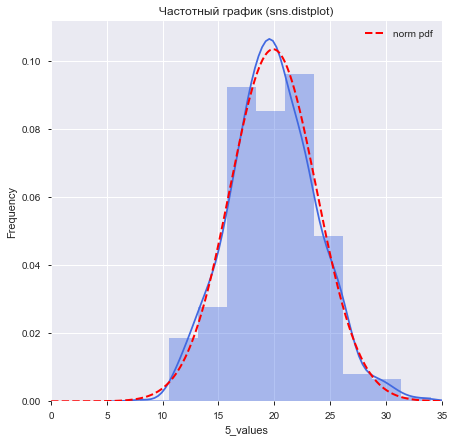

In [49]:
sns.distplot(outcomes, bins=10, color="royalblue") # Частотный график и сравнение с нормальным распределением
plt.title('Частотный график (sns.distplot)')
plt.grid(True)
plt.xlabel('5_values')
plt.ylabel('Frequency')
plt.xlim(0,35)

mu = round(statistics.mean(outcomes), 3) # Среднее значение
sigma = round(statistics.stdev(outcomes), 3) # Стандартное отклонение

norm_rv = sts.norm(loc=mu, scale=sigma) # Random variates
x = np.linspace(0,35,500) 
pdf = norm_rv.pdf(x) # Probability density function

plt.plot(x, pdf, color='red', linestyle='dashed', linewidth=2, label='norm pdf') # График нормального распределения
plt.legend()